# Analysis on Netflix Movies & TV Shows

Netflix is the popular service that people across the word use for entertainment. In this EDA, I will explore the newtflix shows dataset through visulaization and graphs using matplotlib and seaborn.

## Package Install & Import

In [597]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

## Loading the dataset

Now we are ready to load the dataset. We will do this using the standard read_csv command from pandas. Lets take a glimps at how the data looks like.

In [598]:
netflix_titles_df = pd.read_csv("F:/netflix_titles.csv")

In [599]:
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


**After  quick glamps at dataset, it looks like a typical movies/shows dataset without user ratings. We can aso see that there is NaN value in the dataset.**

## Data Preparation & Cleaning

In [600]:
netflix_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


There are 6234 entries and 12 columns to work with EDA. Right off the bat, there are few columns that contain the null values ('director', 'cast', 'country', 'date-added', 'rating')

In [601]:
netflix_titles_df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

# Hndling Null Values

We can see that for each of the columns, there are alot different unique values. For some of them, It make sense that show_id is large since it is a unique key used to identify a movie/show. Title, director, cast, country, date_added, listed-in, and description contain many unique values as well.

In [602]:
netflix_titles_df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,False,False,False,True,False,False,True,False,False,False,False,False
6230,False,False,False,True,False,False,True,False,False,False,False,False
6231,False,False,False,True,True,True,True,False,True,False,False,False
6232,False,False,False,True,False,False,True,False,False,False,False,False


In [603]:
netflix_titles_df.isnull().values.any()

True

In [604]:
netflix_titles_df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [605]:
netflix_titles_df.isnull().sum().sum()

3036

<AxesSubplot:>

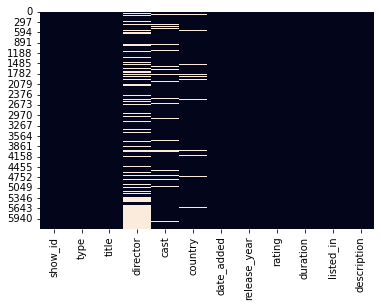

In [606]:
sns.heatmap(netflix_titles_df.isnull(), cbar = False)


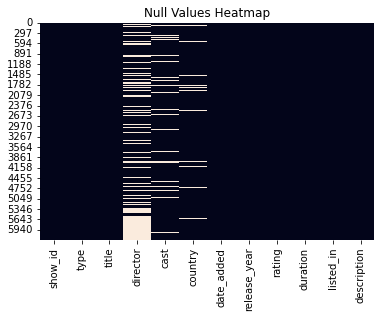

In [301]:
sns.heatmap(netflix_titles_df.isnull(), cbar = False)
plt.title('Null Values Heatmap')
plt.show()

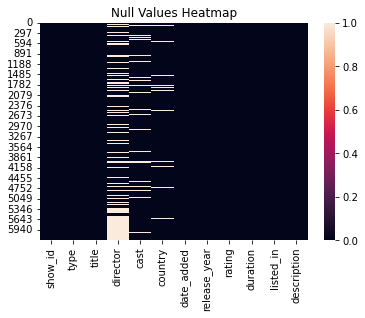

In [302]:
sns.heatmap(netflix_titles_df.isnull(), cbar = True)
plt.title('Null Values Heatmap')
plt.show()

In [303]:
netflix_titles_df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

Above in the heatmap and table we can see that there are quite a few null values in the dataset. There are total of 3036 null values across the entire dataset with 1969 missing points under 'director', 570 under 'cast', 476 unser 'country', 11 under 'data_added', and 10 under 'rating'. We will have to handle all null data points before we can dive into the EDA and modelling.

In [304]:
netflix_titles_df['director'].fillna('No Director', inplace = True)

In [305]:
netflix_titles_df['director'].isnull().values.any()

False

In [306]:
netflix_titles_df['director'].isnull().sum()

0

In [307]:
netflix_titles_df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast            570
country         476
date_added       11
release_year      0
rating           10
duration          0
listed_in         0
description       0
dtype: int64

In [308]:
netflix_titles_df['cast'].fillna('No Cast', inplace = True)
netflix_titles_df['country'].fillna('COuntry Unavailable', inplace = True)
netflix_titles_df.dropna(subset = ['date_added', 'rating'], inplace = True)

In [309]:
netflix_titles_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

For the null values, the easiest way to get rid of them would be to delete the rows with the missing data. However this wouldn't be beneficial to our EDA since there is loss of information. Since 'director', 'cast', and 'country' contain the majority of null values, I will choose to treat each missing values as unavailable. the other two labels 'date_added' and 'rating' contains an insignificant portion of the data so i will drop them from the dataset. After we can see that there are no more null values in the dataset.

In [310]:
netflix_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 0 to 6222
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6214 non-null   int64 
 1   type          6214 non-null   object
 2   title         6214 non-null   object
 3   director      6214 non-null   object
 4   cast          6214 non-null   object
 5   country       6214 non-null   object
 6   date_added    6214 non-null   object
 7   release_year  6214 non-null   int64 
 8   rating        6214 non-null   object
 9   duration      6214 non-null   object
 10  listed_in     6214 non-null   object
 11  description   6214 non-null   object
dtypes: int64(2), object(10)
memory usage: 631.1+ KB


After dropping the rows having the null values in the column date_added & rating, The total no of records have been reduced from 6234 to 6214.

## Spliting the dataset

Since the dataset can either contain movies or shows, it would be better to have datasets for both so we can take a deep dive into just Netflix movies or Netflix TV shows, so we will create new datasets One for movies and other one for shows.

In [311]:
netflix_movies_df = netflix_titles_df[netflix_titles_df['type'] == 'Movie'].copy()

In [312]:
netflix_movies_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
...,...,...,...,...,...,...,...,...,...,...,...,...
5575,80093107,Movie,Toro,Kike Maíllo,"Mario Casas, Luis Tosar, José Sacristán, Claud...",Spain,"April 1, 2017",2016,NR,106 min,"Dramas, International Movies, Thrillers",Ex-con Toro's brother and former partner in cr...
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,No Cast,United States,"April 1, 2016",2007,TV-MA,70 min,Documentaries,Frank was a rising pop star when he married Ci...
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102 min,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88 min,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...


In [313]:
netflix_shows_df = netflix_titles_df[netflix_titles_df['type'] == 'TV Show'].copy()

In [314]:
netflix_shows_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,No Director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,No Director,No Cast,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,No Director,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",COuntry Unavailable,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...
...,...,...,...,...,...,...,...,...,...,...,...,...
6218,80162994,TV Show,Talking Tom and Friends,No Director,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand","April 10, 2019",2017,TV-G,2 Seasons,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...
6219,80186475,TV Show,Pokémon the Series,No Director,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,"April 1, 2019",2019,TV-Y7-FV,2 Seasons,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...
6220,70272742,TV Show,Justin Time,No Director,"Gage Munroe, Scott McCord, Jenna Warren",Canada,"April 1, 2016",2012,TV-Y,2 Seasons,Kids' TV,"In Justin's dreams, he and his imaginary frien..."
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,No Director,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,"April 1, 2016",2016,TV-14,2 Seasons,"International TV Shows, Reality TV",A new set of six men and women start their liv...


In [315]:
netflix_movies_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
...,...,...,...,...,...,...,...,...,...,...,...,...
5575,80093107,Movie,Toro,Kike Maíllo,"Mario Casas, Luis Tosar, José Sacristán, Claud...",Spain,"April 1, 2017",2016,NR,106 min,"Dramas, International Movies, Thrillers",Ex-con Toro's brother and former partner in cr...
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,No Cast,United States,"April 1, 2016",2007,TV-MA,70 min,Documentaries,Frank was a rising pop star when he married Ci...
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102 min,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88 min,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...


## Data Preparation

In the duration column, there appears to be a discrepancy between movies and shows. Movies are based on the duration of the movies and shows are based on the number of seasons. To make EDA easier, I will convert the values in these columns into integers for both the movies and shows datasets.

In [317]:
netflix_movies_df.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [318]:
netflix_movies_df['duration'].dtypes # In the result dtype('O') means that datatype of the duration column is Object

dtype('O')

In [319]:
netflix_movies_df.duration = netflix_movies_df.duration.str.replace(' min', '').astype(int)

In [320]:
netflix_movies_df['duration'].dtypes

dtype('int32')

In [321]:
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


In [322]:
netflix_shows_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,No Director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,No Director,No Cast,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,No Director,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",COuntry Unavailable,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...
...,...,...,...,...,...,...,...,...,...,...,...,...
6218,80162994,TV Show,Talking Tom and Friends,No Director,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand","April 10, 2019",2017,TV-G,2 Seasons,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...
6219,80186475,TV Show,Pokémon the Series,No Director,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,"April 1, 2019",2019,TV-Y7-FV,2 Seasons,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...
6220,70272742,TV Show,Justin Time,No Director,"Gage Munroe, Scott McCord, Jenna Warren",Canada,"April 1, 2016",2012,TV-Y,2 Seasons,Kids' TV,"In Justin's dreams, he and his imaginary frien..."
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,No Director,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,"April 1, 2016",2016,TV-14,2 Seasons,"International TV Shows, Reality TV",A new set of six men and women start their liv...


In [323]:
netflix_shows_df.rename(columns = {'duration': 'seasons'}, inplace = True)

In [324]:
netflix_shows_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,seasons,listed_in,description
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,No Director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,No Director,No Cast,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,No Director,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",COuntry Unavailable,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...
...,...,...,...,...,...,...,...,...,...,...,...,...
6218,80162994,TV Show,Talking Tom and Friends,No Director,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand","April 10, 2019",2017,TV-G,2 Seasons,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...
6219,80186475,TV Show,Pokémon the Series,No Director,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,"April 1, 2019",2019,TV-Y7-FV,2 Seasons,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...
6220,70272742,TV Show,Justin Time,No Director,"Gage Munroe, Scott McCord, Jenna Warren",Canada,"April 1, 2016",2012,TV-Y,2 Seasons,Kids' TV,"In Justin's dreams, he and his imaginary frien..."
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,No Director,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,"April 1, 2016",2016,TV-14,2 Seasons,"International TV Shows, Reality TV",A new set of six men and women start their liv...


In [325]:
netflix_shows_df.replace({'seasons': {'1 Season': '1 Seasons'}}, inplace = True)

In [326]:
netflix_shows_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,seasons,listed_in,description
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Seasons,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Seasons,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,No Director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Seasons,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,No Director,No Cast,United States,"September 8, 2017",2017,TV-MA,1 Seasons,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,No Director,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",COuntry Unavailable,"September 7, 2018",2015,TV-14,1 Seasons,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...
...,...,...,...,...,...,...,...,...,...,...,...,...
6218,80162994,TV Show,Talking Tom and Friends,No Director,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand","April 10, 2019",2017,TV-G,2 Seasons,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...
6219,80186475,TV Show,Pokémon the Series,No Director,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,"April 1, 2019",2019,TV-Y7-FV,2 Seasons,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...
6220,70272742,TV Show,Justin Time,No Director,"Gage Munroe, Scott McCord, Jenna Warren",Canada,"April 1, 2016",2012,TV-Y,2 Seasons,Kids' TV,"In Justin's dreams, he and his imaginary frien..."
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,No Director,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,"April 1, 2016",2016,TV-14,2 Seasons,"International TV Shows, Reality TV",A new set of six men and women start their liv...


In [327]:
netflix_shows_df.seasons = netflix_shows_df.seasons.str.replace(' Seasons', '').astype(int)

In [328]:
netflix_shows_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,seasons,listed_in,description
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,No Director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,No Director,No Cast,United States,"September 8, 2017",2017,TV-MA,1,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,No Director,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",COuntry Unavailable,"September 7, 2018",2015,TV-14,1,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...
...,...,...,...,...,...,...,...,...,...,...,...,...
6218,80162994,TV Show,Talking Tom and Friends,No Director,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand","April 10, 2019",2017,TV-G,2,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...
6219,80186475,TV Show,Pokémon the Series,No Director,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,"April 1, 2019",2019,TV-Y7-FV,2,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...
6220,70272742,TV Show,Justin Time,No Director,"Gage Munroe, Scott McCord, Jenna Warren",Canada,"April 1, 2016",2012,TV-Y,2,Kids' TV,"In Justin's dreams, he and his imaginary frien..."
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,No Director,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,"April 1, 2016",2016,TV-14,2,"International TV Shows, Reality TV",A new set of six men and women start their liv...


## Exploratory Analysis and Visulaization

First we will begin analysis on the entire netflix dataset consisting both movies and shows. Revisiting the data, let us see how it looked like again.

In [329]:
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


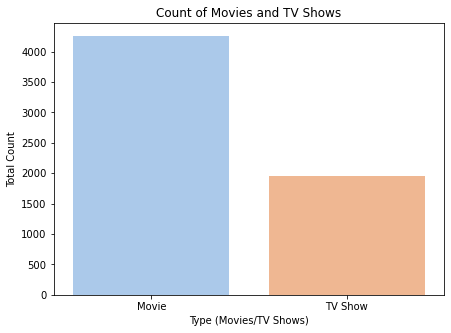

In [330]:
plt.figure(figsize=(7,5))
g = sns.countplot(netflix_titles_df.type, palette = "pastel")
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type (Movies/TV Shows)")
plt.ylabel("Total Count")
plt.show()

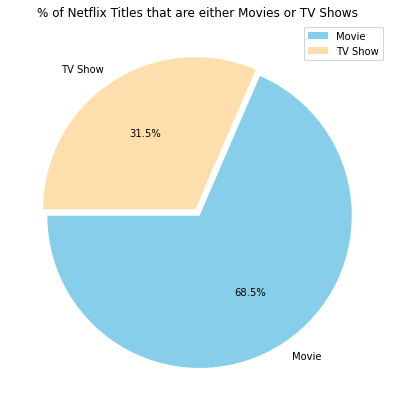

In [341]:
plt.figure(figsize = (12,7))
plt.title("% of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(netflix_titles_df['type'].value_counts(), explode = (0.025, 0.025), labels = netflix_titles_df['type'].value_counts().index, colors = ['skyblue','navajowhite'],autopct = '%1.1f%%', startangle = 180)
plt.legend()
plt.show()

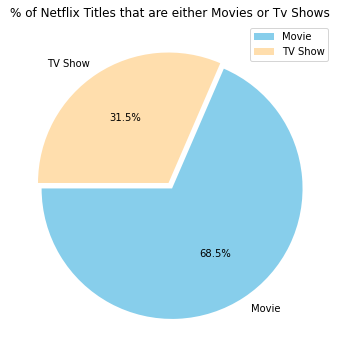

In [342]:
plt.figure(figsize =(12,6))
plt.title("% of Netflix Titles that are either Movies or Tv Shows")
g = plt.pie(netflix_titles_df.type.value_counts(), explode = (0.025, 0.025), labels = netflix_titles_df.type.value_counts().index, colors = ['skyblue','navajowhite'], autopct = '%1.1f%%', startangle = 180)
plt.legend()
plt.show()

In [343]:
netflix_titles_df.type.value_counts()

Movie      4257
TV Show    1957
Name: type, dtype: int64

In [344]:
netflix_titles_df['type'].value_counts()

Movie      4257
TV Show    1957
Name: type, dtype: int64

In [345]:
netflix_titles_df['type'].value_counts().index

Index(['Movie', 'TV Show'], dtype='object')

In [346]:
netflix_titles_df.type.value_counts().index

Index(['Movie', 'TV Show'], dtype='object')

So there are roughly 4000+ movies and almost 2000 shows with movies being the majority. This makes sense since shows are always an ongoing thing and have episodes. If we were to do headcount of TV show episodes vs. movies, I am sure that TV show will come out as the majority. However, in terms of title, there are far more movies titles (68.6%) and TV show title(31.5%)

## Netflix film ratings

Now we will explore the ratings which is based on the film rating system. The ordering of the ratings will be based on age of the respective audience from youngest to oldest. We will not include the ratings 'NR' and 'UR' in the visuals since they stand for unrated and non-rated content. 

In [347]:
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [348]:
netflix_titles_df.rating.unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', 'UR', 'NC-17'], dtype=object)

In [349]:
netflix_titles_df['rating'].unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', 'UR', 'NC-17'], dtype=object)

In [350]:
netflix_titles_df.rating.nunique()

14

In [351]:
netflix_titles_df['rating'].nunique()

14

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


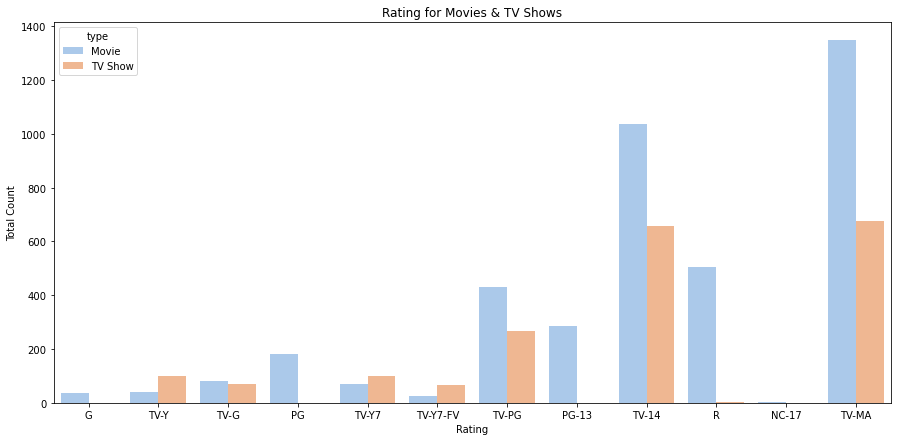

In [352]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize = (15,7))
g = sns.countplot(netflix_titles_df['rating'], hue = netflix_titles_df['type'], order = order, palette = "pastel" )
plt.title("Rating for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total Count')

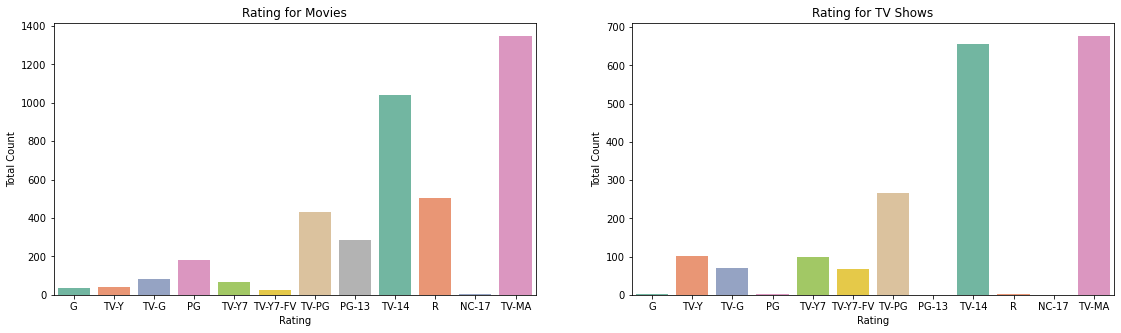

In [353]:
fig, ax = plt.subplots(1,2, figsize = (19,5))
g1 = sns.countplot(netflix_movies_df['rating'], order = order, palette = "Set2", ax = ax[0])
g1.set_title("Rating for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count")

g2 = sns.countplot(netflix_shows_df['rating'], order = order, palette = "Set2", ax = ax[1])
g2.set_title("Rating for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count")

Overall, there are much more content for a more mature audience. For mature audience audience, there is much more movie content than there are TV shows. However, for the younger audience (under the age of 17), it is th opposite, there are slightly more TV shows than there are movies.

In [354]:
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [355]:
netflix_titles_df['year_added'] = pd.DatetimeIndex(netflix_titles_df['date_added']).year

In [356]:
netflix_titles_df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017


In [357]:
netflix_movies_df['year_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).year

In [358]:
netflix_movies_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,2017
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",2017
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5575,80093107,Movie,Toro,Kike Maíllo,"Mario Casas, Luis Tosar, José Sacristán, Claud...",Spain,"April 1, 2017",2016,NR,106,"Dramas, International Movies, Thrillers",Ex-con Toro's brother and former partner in cr...,2017
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,No Cast,United States,"April 1, 2016",2007,TV-MA,70,Documentaries,Frank was a rising pop star when he married Ci...,2016
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...,2016
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...,2016


In [359]:
netflix_shows_df['year_added'] = pd.DatetimeIndex(netflix_shows_df['date_added']).year

In [360]:
netflix_shows_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,seasons,listed_in,description,year_added
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1,Kids' TV,"With the help of three human allies, the Autob...",2018
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1,Kids' TV,When a prison ship crash unleashes hundreds of...,2018
5,80163890,TV Show,Apaches,No Director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,2017
8,80117902,TV Show,Fire Chasers,No Director,No Cast,United States,"September 8, 2017",2017,TV-MA,1,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",2017
26,80244601,TV Show,Castle of Stars,No Director,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",COuntry Unavailable,"September 7, 2018",2015,TV-14,1,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6218,80162994,TV Show,Talking Tom and Friends,No Director,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand","April 10, 2019",2017,TV-G,2,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...,2019
6219,80186475,TV Show,Pokémon the Series,No Director,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,"April 1, 2019",2019,TV-Y7-FV,2,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...,2019
6220,70272742,TV Show,Justin Time,No Director,"Gage Munroe, Scott McCord, Jenna Warren",Canada,"April 1, 2016",2012,TV-Y,2,Kids' TV,"In Justin's dreams, he and his imaginary frien...",2016
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,No Director,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,"April 1, 2016",2016,TV-14,2,"International TV Shows, Reality TV",A new set of six men and women start their liv...,2016


In [361]:
netflix_titles_df['month_added'] = pd.DatetimeIndex(netflix_titles_df['date_added']).month
netflix_movies_df['month_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).month
netflix_shows_df['month_added'] = pd.DatetimeIndex(netflix_shows_df['date_added']).month

In [362]:
netflix_titles_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,9
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,9
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,9
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6218,80162994,TV Show,Talking Tom and Friends,No Director,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand","April 10, 2019",2017,TV-G,2 Seasons,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...,2019,4
6219,80186475,TV Show,Pokémon the Series,No Director,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,"April 1, 2019",2019,TV-Y7-FV,2 Seasons,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...,2019,4
6220,70272742,TV Show,Justin Time,No Director,"Gage Munroe, Scott McCord, Jenna Warren",Canada,"April 1, 2016",2012,TV-Y,2 Seasons,Kids' TV,"In Justin's dreams, he and his imaginary frien...",2016,4
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,No Director,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,"April 1, 2016",2016,TV-14,2 Seasons,"International TV Shows, Reality TV",A new set of six men and women start their liv...,2016,4


In [363]:
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,9
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,9
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,9
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,9


In [364]:
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,9
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...,2017,9
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",2017,9
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,2017,9


In [365]:
netflix_shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,seasons,listed_in,description,year_added,month_added
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1,Kids' TV,"With the help of three human allies, the Autob...",2018,9
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,9
5,80163890,TV Show,Apaches,No Director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,2017,9
8,80117902,TV Show,Fire Chasers,No Director,No Cast,United States,"September 8, 2017",2017,TV-MA,1,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",2017,9
26,80244601,TV Show,Castle of Stars,No Director,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",COuntry Unavailable,"September 7, 2018",2015,TV-14,1,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...,2018,9


## Content added each year

Now we will take a look at the amount content netflix has added throughout the prvious years. Since we are interested in when Netflix added the title onto their platform, We will add a 'year_added' column shows that year of the date from teh date-added column as shown in the above table.

In [397]:
netflix_year = netflix_titles_df['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
netflix_year = netflix_year[netflix_year.year != 2020]
netflix_year

,year,count
0,2019,2349
1,2018,1781
2,2017,1297
3,2016,453
5,2015,88
6,2014,25
7,2011,13
8,2013,12
9,2012,7
10,2009,2


In [401]:
netflix_year2 = netflix_titles_df[['type', 'year_added']]
movie_year = netflix_year2[netflix_year2['type'] == 'Movie']['year_added'].value_counts().to_frame().reset_index().rename(columns = {'index': 'year', 'year_added':'count'}) 

In [404]:
movie_year = movie_year[movie_year['year'] != 2020]

In [405]:
movie_year

,year,count
0,2019,1546
1,2018,1290
2,2017,910
3,2016,262
5,2015,56
6,2014,19
7,2011,13
8,2013,6
9,2012,4
10,2009,2


In [413]:
show_year = netflix_year2[netflix_year2['type']=='TV Show']['year_added'].value_counts().to_frame().reset_index().rename(columns= {'index':'year','year_added':'count'})

In [414]:
show_year

,year,count
0,2019,803
1,2018,491
2,2017,387
3,2016,191
4,2020,37
5,2015,32
6,2013,6
7,2014,6
8,2012,3
9,2008,1


In [415]:
show_year = show_year[show_year['year'] != 2020]

In [416]:
show_year

,year,count
0,2019,803
1,2018,491
2,2017,387
3,2016,191
5,2015,32
6,2013,6
7,2014,6
8,2012,3
9,2008,1


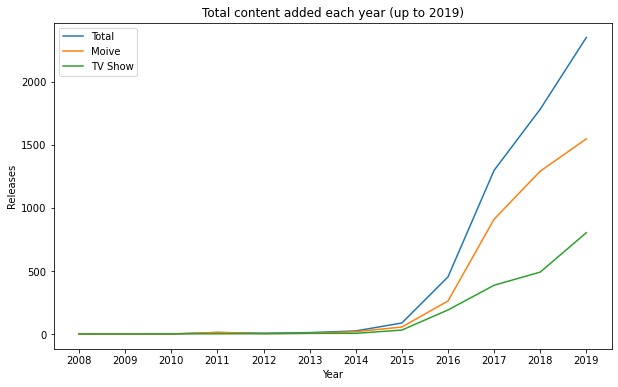

In [420]:
fig, ax = plt.subplots(figsize= (10,6))
sns.lineplot(data = netflix_year, x = "year", y = 'count')
sns.lineplot(data = movie_year, x = 'year', y = 'count')
sns.lineplot(data = show_year, x = 'year', y = 'count')
ax.set_xticks(np.arange(2008,2020,1))
plt.title("Total content added each year (up to 2019)")
plt.legend(['Total', 'Moive', 'TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()


In [421]:
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,9
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,9
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,9
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,9


Based on the above timeline, we can see that the popular streaming platform started gaining traction after 2014. Since then, the amount of content added has been tremendous. I decided to exclude content added during 2020 since the data does not include a full years worth of data. We can see that there has been a consistent growth in the number of movies on Netflix compared to shows.

In [422]:
netflix_titles_df['month_added'].nunique()

12

In [438]:
month_year_df = netflix_titles_df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

In [439]:
month_year_df

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
month_added,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,44.0,73.0,137.0,167.0,184.0
2,1.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0,16.0,87.0,92.0,174.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,19.0,145.0,182.0,198.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,2.0,7.0,23.0,98.0,132.0,183.0,0.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,7.0,14.0,114.0,108.0,183.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,19.0,96.0,81.0,189.0,0.0
7,0.0,0.0,0.0,0.0,2.0,0.0,1.0,8.0,31.0,82.0,164.0,186.0,0.0
8,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,43.0,118.0,179.0,163.0,0.0
9,0.0,0.0,0.0,1.0,0.0,2.0,1.0,7.0,47.0,124.0,134.0,162.0,0.0


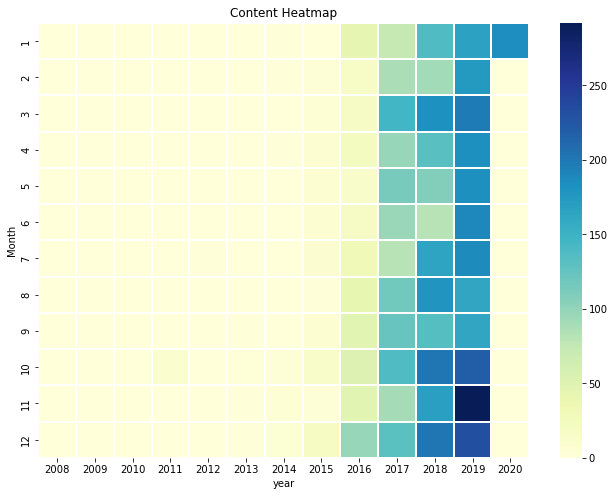

In [440]:
plt.figure(figsize = (11,8))
sns.heatmap(month_year_df, linewidths = 0.025, cmap = "YlGnBu")
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel('year')
plt.show()

In the above heatmap, we can see that around 2014 is when Netflix began to increase their content count. We can see over the years and months, Netflix continues to slowly increase the amount of content that is being added into their platform. We can see in 2020, the data stops at January since that is the latest month available in the dataset.



## Netflix film duration

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\AppData\Local\Temp\ipykernel_4880\2751008927.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


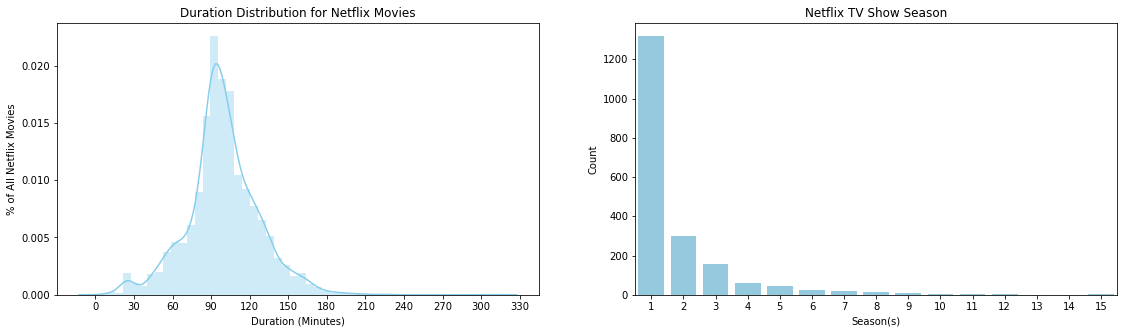

In [442]:
fig, ax = plt.subplots(1,2, figsize = (19,5))
g1 = sns.distplot(netflix_movies_df['duration'], color = 'skyblue', ax = ax[0])
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (Minutes)")
g2 = sns.countplot(netflix_shows_df['seasons'], color = 'skyblue', ax = ax[1])
g2.set_title("Netflix TV Show Season")
g2.set_ylabel("Count")
g2.set_xlabel("Season(s)")
fig.show()

Now we will look into the duration of Netflix films. Since movies are measured in time and shows are measured by seasons, we need to split the dataset between movies and TV shows. Above on the left, we can see that the duration for Netflix movies closely resembles a normal distribution with the average viewing time spanning about 90 minutes which seems to make sense. Netflix TV shows on the other hand seems to be heavily skewed to the right where the majority of shows only have 1 season.

## Countries with most content available

In [443]:
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,9
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,9
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,9
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,9


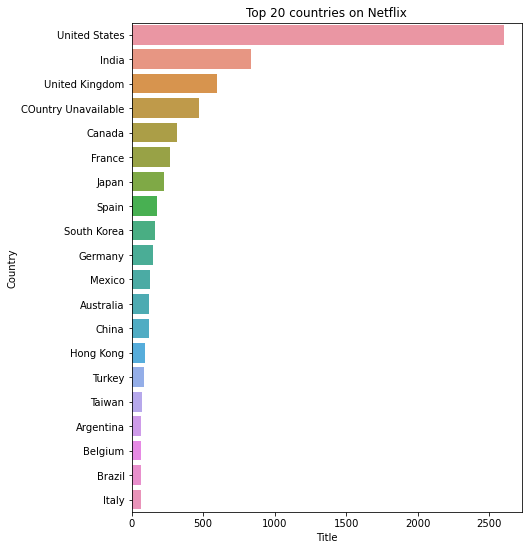

In [458]:
filtered_countries = netflix_titles_df.set_index('title')['country'].str.split(', ', expand = True).stack().reset_index(level = 1, drop = True)
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize = (7,9))
g = sns.countplot(y = filtered_countries, order = filtered_countries.value_counts().index[:20])
plt.title('Top 20 countries on Netflix')
plt.xlabel('Title')
plt.ylabel('Country')
plt.show()

In [470]:
type(netflix_titles_df.set_index('title')['country'].str.split(', ',expand = True ))

pandas.core.frame.DataFrame

In [473]:
netflix_titles_df.set_index('title')['country'].str.split(', ', expand = True)

,0,1,2,3,4,5,6,7,8,9,10,11
title,,,,,,,,,,,,
Norm of the North: King Sized Adventure,United States,India,South Korea,China,None,None,None,None,None,None,None,None
Jandino: Whatever it Takes,United Kingdom,None,None,None,None,None,None,None,None,None,None,None
Transformers Prime,United States,None,None,None,None,None,None,None,None,None,None,None
Transformers: Robots in Disguise,United States,None,None,None,None,None,None,None,None,None,None,None
#realityhigh,United States,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
Talking Tom and Friends,Cyprus,Austria,Thailand,None,None,None,None,None,None,None,None,None
Pokémon the Series,Japan,None,None,None,None,None,None,None,None,None,None,None
Justin Time,Canada,None,None,None,None,None,None,None,None,None,None,None


In [479]:
netflix_titles_df.set_index('title')['country'].str.split(', ', expand = True).stack()

title                                     
Norm of the North: King Sized Adventure  0     United States
                                         1             India
                                         2       South Korea
                                         3             China
Jandino: Whatever it Takes               0    United Kingdom
                                                   ...      
Talking Tom and Friends                  2          Thailand
Pokémon the Series                       0             Japan
Justin Time                              0            Canada
Terrace House: Boys & Girls in the City  0             Japan
Weeds                                    0     United States
Length: 7635, dtype: object

In [483]:
netflix_titles_df.set_index('title')['country'].str.split(', ', expand = True).stack().reset_index(level = 1, drop = True)

title
Norm of the North: King Sized Adventure     United States
Norm of the North: King Sized Adventure             India
Norm of the North: King Sized Adventure       South Korea
Norm of the North: King Sized Adventure             China
Jandino: Whatever it Takes                 United Kingdom
                                                ...      
Talking Tom and Friends                          Thailand
Pokémon the Series                                  Japan
Justin Time                                        Canada
Terrace House: Boys & Girls in the City             Japan
Weeds                                       United States
Length: 7635, dtype: object

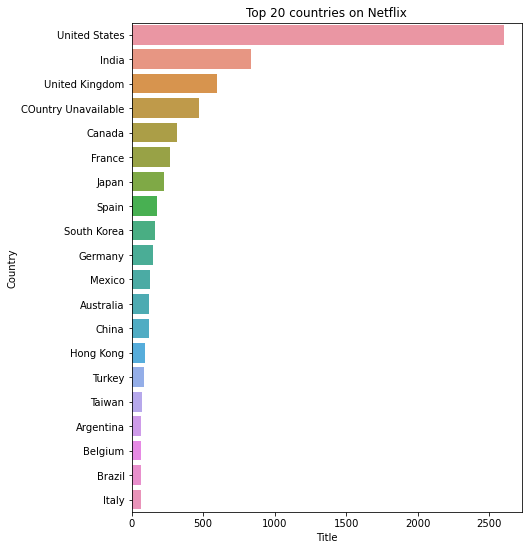

In [484]:
filtered_countries = netflix_titles_df.set_index('title')['country'].str.split(', ', expand = True).stack().reset_index(level = 1, drop = True)
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

plt.figure(figsize = (7,9))
g = sns.countplot(y = filtered_countries, order = filtered_countries.value_counts().index[:20])
plt.title('Top 20 countries on Netflix')
plt.xlabel('Title')
plt.ylabel('Country')
plt.show()

In [496]:
filtered_countries

title
Norm of the North: King Sized Adventure     United States
Norm of the North: King Sized Adventure             India
Norm of the North: King Sized Adventure       South Korea
Norm of the North: King Sized Adventure             China
Jandino: Whatever it Takes                 United Kingdom
                                                ...      
Talking Tom and Friends                          Thailand
Pokémon the Series                                  Japan
Justin Time                                        Canada
Terrace House: Boys & Girls in the City             Japan
Weeds                                       United States
Length: 7635, dtype: object

Now we will explore the countries with the most content on Netflix. Films typically are available in multiple countries as shown in the original dataset. Therefore, we need to seperate all countries within a film before we can analyze the data. After seperating countries and removing titles with no countries available, we can plot a Top 20 list to see which countries have the highest availability of films on Netflix. Unsurprisingly, the United States stands out on top since Netflix is an American company. India surprisingly comes in second followed by the UK and Canada. China interestingly is not even close to the top even though it has about 18% of the world's population. Reasons for this could be for political reasons and the banning of certain applications which isn't uncommon between the United States and China.

# Asking and answering question

## Who are the top 10 directors on Netflix with the most releases?

In [497]:
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,9
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,9
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,9
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,9


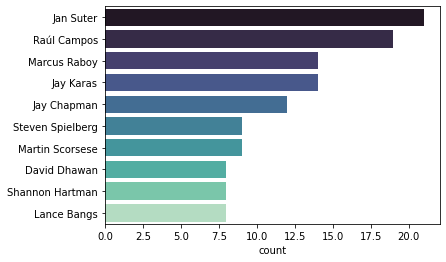

In [518]:
filtered_director = netflix_titles_df[netflix_titles_df['director'] != 'No Director'].set_index('title')['director'].str.split(', ', expand = True).stack().reset_index(level = 1, drop = True)

sns.countplot(y = filtered_director, order = filtered_director.value_counts().index[:10], palette = 'mako')
plt.show()

In [519]:
filtered_director.value_counts().index[:10]

Index(['Jan Suter', 'Raúl Campos', 'Marcus Raboy', 'Jay Karas', 'Jay Chapman',
       'Steven Spielberg', 'Martin Scorsese', 'David Dhawan',
       'Shannon Hartman', 'Lance Bangs'],
      dtype='object')

As stated previously regarding the top genres, it's no surprise that the most popular directors on Netflix with the most titles are mainly international as well.

### Who are the top 10 actors on Netflix based on number of titles?

In [520]:
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,9
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,9
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,9
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,9


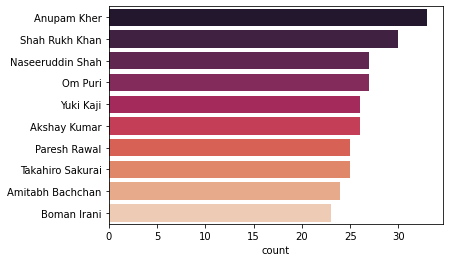

In [533]:
filtered_cast = netflix_titles_df[netflix_titles_df['cast'] != 'No Cast'].set_index('title')['cast'].str.split(', ', expand = True).stack().reset_index(level = 1, drop = True)
sns.countplot(y = filtered_cast, order = filtered_cast.value_counts().index[:10], palette = 'rocket')
plt.show()

In [534]:
filtered_cast

title
Norm of the North: King Sized Adventure        Alan Marriott
Norm of the North: King Sized Adventure          Andrew Toth
Norm of the North: King Sized Adventure         Brian Dobson
Norm of the North: King Sized Adventure          Cole Howard
Norm of the North: King Sized Adventure     Jennifer Cameron
                                                 ...        
Weeds                                      Elizabeth Perkins
Weeds                                            Allie Grant
Weeds                                            Andy Milder
Weeds                                           Tonye Patano
Weeds                                           Romany Malco
Length: 44201, dtype: object

In this list, we can see that the most popular actors on Netflix based on the number of titles are all international as well. This reinforces the sentiment that the majority of Netflix subscribers are international.

### How does the timeline look like for the addition of international movies compared to international TV shows?

In [535]:
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,9
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,9
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,9
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,9


In [562]:
netflix_titles_df[netflix_titles_df['listed_in'] == 'International TV Shows']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
689,81006356,TV Show,Devlok with Devdutt Pattanaik,No Director,"Rasika Dugal, Devdutt Pattanaik",India,"October 15, 2018",2017,TV-PG,1 Season,International TV Shows,"Through chats with host Rasika Dugal, mytholog...",2018,10
2880,81128790,TV Show,Eurovision Song Contest,No Director,"Bar Refaeli, Erez Tal, Assi Azar, Lucy Ayoub",COuntry Unavailable,"July 23, 2019",2019,TV-PG,1 Season,International TV Shows,Singers from all over Europe represent their c...,2019,7


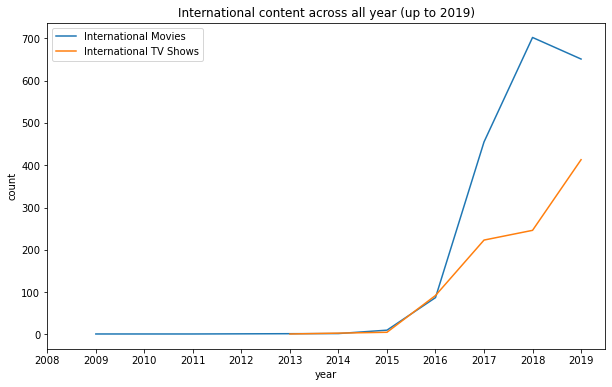

In [575]:
international_movies = netflix_titles_df[netflix_titles_df['listed_in'].str.contains('International Movies')]
intmov_year = international_movies['year_added'].value_counts().to_frame().reset_index().rename(columns={'index':'year', 'year_added':'count'})
intmov_year = intmov_year[intmov_year['year'] != 2020]


international_shows = netflix_titles_df[netflix_titles_df['listed_in'].str.contains('International TV Shows')]
intshow_year = international_shows['year_added'].value_counts().to_frame().reset_index().rename(columns = {'index': 'year', 'year_added': 'count'})
intshow_year = intshow_year[intshow_year['year'] != 2020]

fig, ax= plt.subplots(figsize = (10,6))
sns.lineplot(data = intmov_year, x = 'year', y = 'count')
sns.lineplot(data = intshow_year, x = 'year', y = 'count')

ax.set(xticks = np.arange(2008, 2020, 1))
plt.title("International content across all year (up to 2019)")
plt.legend(['International Movies', 'International TV Shows'])
plt.show()

Based on the timeline, we can see that there are far more international movie releases than there are international tv show releases. However, near 2018, the growth of international movies started to decline while international tv shows constantly showed significant growth in the past few years.

In [577]:
international_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",2017,9
11,70299204,Movie,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,R,95 min,"Action & Adventure, Dramas, International Movies","When beer magnate Alfred ""Freddy"" Heineken is ...",2017,9
21,80046728,Movie,Moonwalkers,Antoine Bardou-Jacquet,"Ron Perlman, Rupert Grint, Robert Sheehan, Ste...","France, Belgium","September 8, 2017",2015,R,96 min,"Action & Adventure, Comedies, International Mo...","A brain-addled war vet, a failing band manager...",2017,9
29,70241607,Movie,Laddaland,Sopon Sukdapisit,"Saharat Sangkapreecha, Pok Piyatida Woramusik,...",Thailand,"September 7, 2018",2011,TV-MA,112 min,"Horror Movies, International Movies",When a family moves into an upscale housing de...,2018,9
32,80159586,Movie,The Most Assassinated Woman in the World,Franck Ribière,"Anna Mouglalis, Niels Schneider, André Wilms, ...","Belgium, United Kingdom, United States","September 7, 2018",2018,TV-MA,102 min,"Dramas, International Movies, Thrillers","In 1930s Paris, an actress famous for her gory...",2018,9


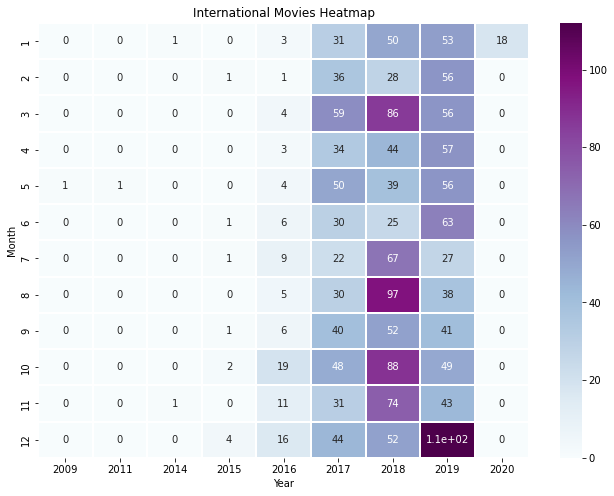

In [595]:
intmov_month_year_df = international_movies.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

fig, ax = plt.subplots(figsize = (11,8))
sns.heatmap(intmov_month_year_df, linewidths = 0.025, cmap= "BuPu", annot = True)
plt.title("International Movies Heatmap")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

In the heatmap above, we can see that a majority of international movies were added throughout the year in 2018. Then in December 2019, Netflix added the most international movie content.



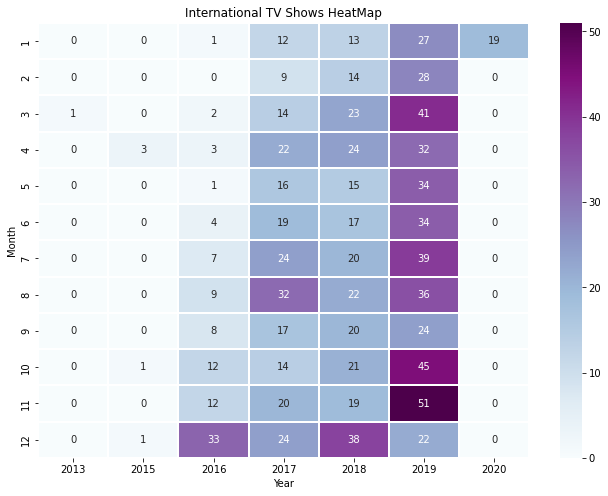

In [594]:
intshow_month_year_df = international_shows.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

fig, ax = plt.subplots(figsize = (11,8))
sns.heatmap(intshow_month_year_df, linewidth = 0.025, cmap = "BuPu",annot = True)
plt.title("International TV Shows HeatMap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()